# 1. Logistic Regression: Training stability
In this problem, we will be delving deeper into the workings of logistic regression. The goal of this problem is to help you develop your skills debugging machine learning algorithms (which can be very different from debugging software in general).
We have provided an implementation of logistic regression in `src/p01 lr.py`, and two labeled datasets A and B in `data/ds1_a.txt` and `data/ds1_b.txt`.
Please do not modify the code for the logistic regression training algorithm for this problem. First, run the given logistic regression code to train two different models on A and B. You can run the code by simply executing python `p01_lr.py` in the `src` directory.

In [1]:
import src.util as util
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
# Important note: you do not have to modify this file for your homework.

#NOTE: WE DID SOME CHANGE IN THE CODE!!


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        
        if i % 50000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            util.plot(X, Y, theta=theta, save_path=None, correction=1.0)
            break
        if i >=2e6:
            print('Algorithm did not stop after %d iterations!!!, WHY?' % i)
            util.plot(X, Y, theta=theta, save_path=None, correction=1.0)
            break
    return


def main():
    print('==== Training model on data set A ====')
    Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
    logistic_regression(Xa, Ya)

    print('\n==== Training model on data set B ====')
    Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)
    logistic_regression(Xb, Yb)

==== Training model on data set A ====
Converged in 30395 iterations


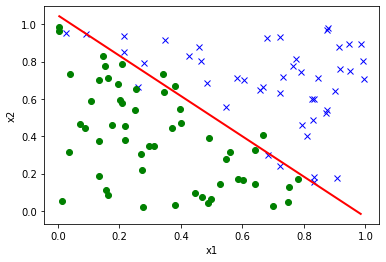


==== Training model on data set B ====
Finished 50000 iterations
Finished 100000 iterations
Finished 150000 iterations
Finished 200000 iterations
Finished 250000 iterations
Finished 300000 iterations
Finished 350000 iterations
Finished 400000 iterations
Finished 450000 iterations
Finished 500000 iterations
Finished 550000 iterations
Finished 600000 iterations
Finished 650000 iterations
Finished 700000 iterations
Finished 750000 iterations
Finished 800000 iterations
Finished 850000 iterations
Finished 900000 iterations
Finished 950000 iterations
Finished 1000000 iterations
Finished 1050000 iterations
Finished 1100000 iterations
Finished 1150000 iterations
Finished 1200000 iterations
Finished 1250000 iterations
Finished 1300000 iterations
Finished 1350000 iterations
Finished 1400000 iterations
Finished 1450000 iterations
Finished 1500000 iterations
Finished 1550000 iterations
Finished 1600000 iterations
Finished 1650000 iterations
Finished 1700000 iterations
Finished 1750000 iterations


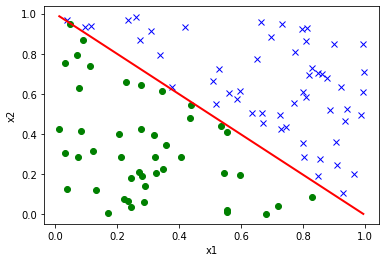

In [3]:
main()

<b>(a)</b> [2 points] What is the most notable difference in training the logistic regression model on datasets A and B?
### Answer: 
The logistic regression model on datasets A converges while on datasets B, it wont converge!!

<b> (b)</b> [5 points] Investigate why the training procedure behaves unexpectedly on dataset B, but not on A. Provide hard evidence (in the form of math, code, plots, etc.) to corroborate your hypothesis for the misbehavior. Remember, you should address why your explanation does not apply to A.

<b> Hint</b>: The issue is not a numerical rounding or over/underflow error.
### Answer: 
Lets take a look at the datas:

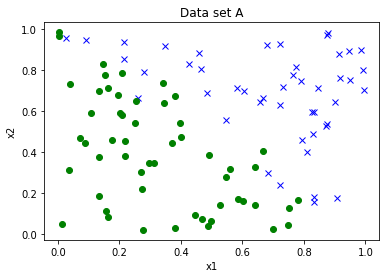

In [4]:
Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
util.plot(Xa, Ya, theta=None, save_path=None, correction=1.0, title = 'Data set A')

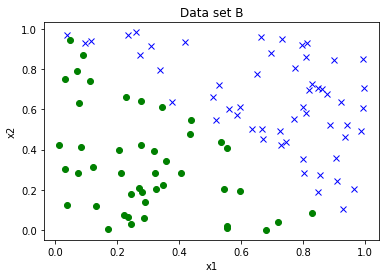

In [5]:
Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)
util.plot(Xb, Yb, theta=None, save_path=None, correction=1.0, title = 'Data set B')

It is notable that the training set A is not linearly sepatable while the thetraining set B is!

We remind that $h_\theta(x) = \frac{1}{1+e^{-x.\theta}}$ and hence 
\begin{align*}
1-h_\theta(x) = \frac{e^{-x.\theta}}{1+e^{-x.\theta}} = \frac{1}{1+e^{x.\theta}}.
\end{align*}
In logestic regression, we want to find $\theta$ minimizing 
\begin{align*}
l(\theta) 
& =-\frac{1}{m}\sum \Big(1_{y^{(i)}=1}\log h_\theta(x^{(i)}) + 1_{y^{(i)}=-1}\log \big(1-h_\theta(x^{(i)})\big) \Big) \\
& =-\frac{1}{m}\sum \log \frac{1}{1+e^{-y^{(i)}x^{(i)}.\theta}}\\
& = \frac{1}{m}\sum \log \big(1+e^{-y^{(i)}x^{(i))}.\theta}\big).
\end{align*}
    
Note that $l(\theta)>0$ for each $\theta$.
Whenever the data is linearly seperable, there are some $\theta$ for which $y^{(i)}x^{(i)}.\theta>0$ for each $i$. Therefore, multiplying theta by a large positive integre makes $l(\theta)$ extremely small which indicates that $l(\theta)$ can be as small as we want, thus it has no global minimum!! Changing $\theta$ in the negatrive direction of gradiant makse $l(\theta)$ smaller and smaller but it there is no global minimum that the algorithm converges to! However, since gradiant is vanishing, eventually algorithm stops due to meeting the stoping criteria, but it will take too long time!

But, when the dataset is not linearly seperable, for each direction $\theta$, multiplying $\theta$ by a scaler tending to infinity forces $l(\theta)$ to tend to infinity. Therefore, since $l(\theta)$ is convex, $l(\theta)$ has a unique global minumum which the algorithm finally converges to it. 

<b>(c)</b> [5 points] For each of these possible modifications, state whether or not it would lead to the provided training algorithm converging on datasets such as B. Justify your answers.

1. Using a different constant learning rate.
2. Decreasing the learning rate over time (e.g. scaling the initial learning rate by $\frac{1}{t^2}$, where $t$ is the number of gradient descent iterations thus far).
3. Linear scaling of the input features.
4. Adding a regularization term $\|\theta\|^2_2$ to the loss function.
5. Adding zero-mean Gaussian noise to the training data or labels.


### Answer:
1. No. If we use a very small learning rate in order to force the algorithm to meet the stoping criteria sooner, then probably we have no meaningfull update in $\theta$ and the algorithm returns a $\theta$ which is not appropriate. 
2. Yes. It could be a solution but not a good one. As $t$ grows, the algorithm will finally meet the stoping criterial in roughly $5 \times 10^7$ interations which is still too large. 
3. No. It dose not change the linear seperability of the data!
4. Yes. It prevents the norm of $\theta$ to be arbitrary large. 
5. Yes. It makes the data not linearly seperable.

<b>(d)</b> [3 points] Are support vector machines, which use the hinge loss, vulnerable to datasets like B? Why or why not? Give an informal justification.

<b> Hint:</b> Recall the distinction between functional margin and geometric margin.
### Answer:
 
No. Note that, for a $\theta$ with boundary seperating the data, the objective function using hinge loss in not sensetive with respect to multiplying the $\theta$ by a large sclaler. As the data in linearly seperable, the hinge loss becomes zero as for the appropriate $\theta$ as well as the norm of the subgradiant.   